In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker

In [3]:
iso_sim = pd.read_csv('../data/bigo.csv')
iso_sim = iso_sim[:len(iso_sim)-1]
iso_sim

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1895,1200,3674284992,44,50,5579.225449
1896,1200,3143083259,54,46,3402.269098
1897,1200,10550340359,52,52,15370.186402
1898,1200,10709534879,48,50,10133.434150


In [4]:
xt_labs = [x for x in iso_sim['seq_len'].unique() if x % 100 == 0]

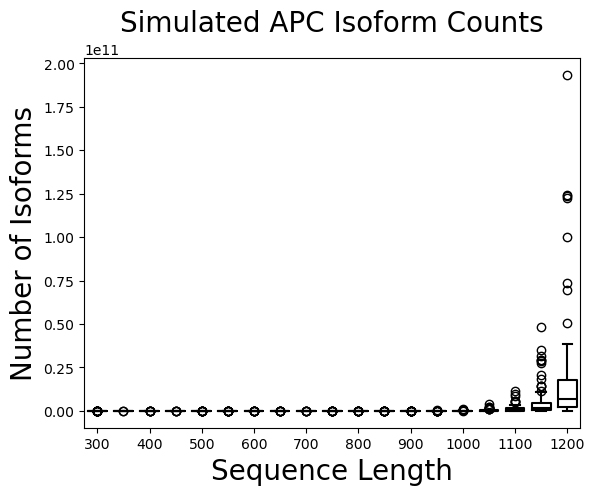

In [5]:
sim_bplot = sns.boxplot(data=iso_sim, x='seq_len', y='iso_count', fill=False, gap=.1, color='black')
sim_bplot.set_xticks(range(len(iso_sim['seq_len'].unique())))
sim_bplot.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], xt_labs)
sim_bplot.set_xlabel("Sequence Length", fontsize='20')
sim_bplot.set_ylabel("Number of Isoforms", fontsize='20')
sim_bplot.set_title("Simulated APC Isoform Counts", fontsize='20', y=1.05)

fig = sim_bplot.get_figure()
fig.savefig("apc_sim.png", format="png", bbox_inches="tight")

In [18]:
ss_counts = pd.read_csv('ss_counts.csv')

In [19]:
ss_counts

,dons,accs,seq_len
0,26,29,730
1,18,95,1057
2,14,14,646
3,25,26,808
4,22,27,730
...,...,...,...
916,28,40,866
917,14,6,435
918,32,25,832
919,24,30,1007


"\nsns.lineplot(x='mid', y='value', hue='variable',\n        data=pd.melt(all_counts, ['mid']))\nax.set_xticks(base_dfreq_df['mid'])\nax.xaxis.grid(True)\nax.set_xlabel('Overlap Midpoint')\nax.set_ylabel('Number of Genes')\nplt.savefig('freq_poly', format='svg')\n"

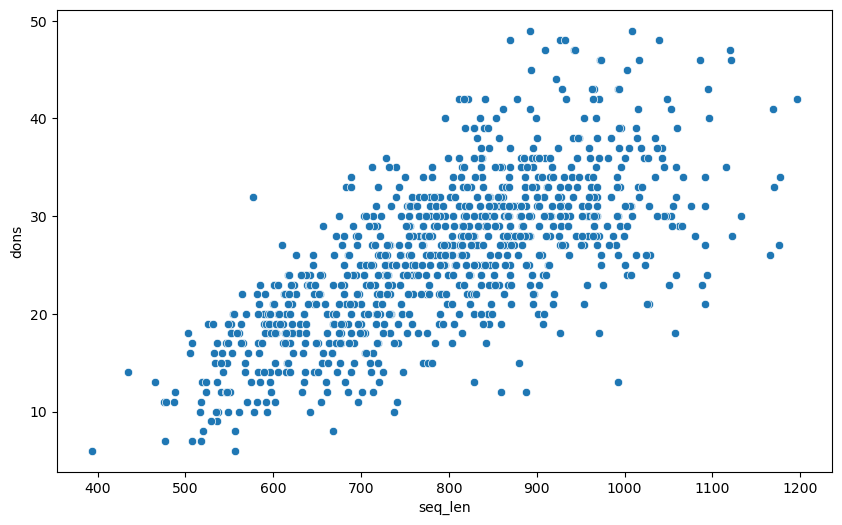

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='seq_len', y='dons', data=ss_counts)
'''
sns.lineplot(x='mid', y='value', hue='variable',
        data=pd.melt(all_counts, ['mid']))
ax.set_xticks(base_dfreq_df['mid'])
ax.xaxis.grid(True)
ax.set_xlabel('Overlap Midpoint')
ax.set_ylabel('Number of Genes')
plt.savefig('freq_poly', format='svg')
'''

In [5]:
pwm20 = pd.read_csv('../data/sg_rnaseq_pwm_20bp.csv', header=None)
pwm20.head(10)

,0,1,2,3,4
0,smallgenes_rnaseq_relative_donpwm,0.032819,0.014615,0.014838,0.026514
1,smallgenes_rnaseq_relative_donpwm,0.019318,0.009823,0.010735,0.013278
2,smallgenes_rnaseq_relative_donpwm,0.038890,0.024539,0.018565,0.014966
3,smallgenes_rnaseq_relative_donpwm,0.143828,0.038324,0.031651,0.060549
4,smallgenes_rnaseq_relative_donpwm,0.069109,0.033438,0.244270,0.063508
5,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,2.000000,0.000000
6,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,0.000000,2.000000
7,smallgenes_rnaseq_relative_donpwm,0.364980,0.008178,0.122333,0.095131
8,smallgenes_rnaseq_relative_donpwm,0.517074,0.041288,0.053633,0.111615
9,smallgenes_rnaseq_relative_donpwm,0.075285,0.026691,0.704060,0.103733


In [6]:
pwm20_don = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_donpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_don.head(5)

,A,C,G,T
0,0.032819,0.014615,0.014838,0.026514
1,0.019318,0.009823,0.010735,0.013278
2,0.038890,0.024539,0.018565,0.014966
3,0.143828,0.038324,0.031651,0.060549
4,0.069109,0.033438,0.244270,0.063508


In [7]:
pwm20_acc = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_accpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_acc.head(5)

,A,C,G,T
20,0.142444,0.043767,0.019292,0.100835
21,0.080952,0.033386,0.019210,0.086678
22,0.077257,0.032734,0.021609,0.100955
23,0.064045,0.027519,0.020824,0.077475
24,0.073747,0.031291,0.020163,0.086534


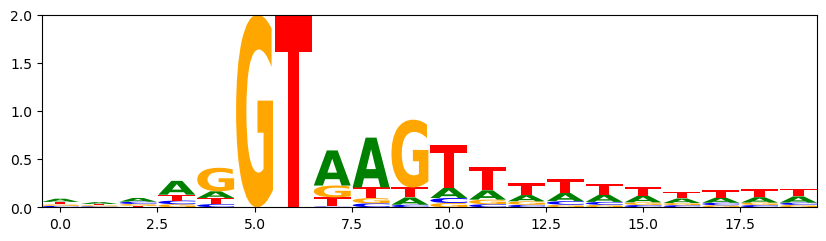

In [8]:
don20_logo = logomaker.Logo(pwm20_don, shade_below=.5, fade_below=.5)

This pwm suggests the donor site should include 2 base pairs upstream, into the exon sequence. The main donor site should also be 7 base pairs long. Suggested donor site motif would be AGGTAAGTT.

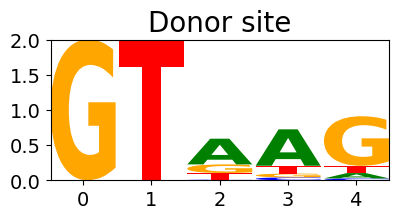

In [9]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

don5_pwm = pwm20_don[5:10].reset_index(drop=True)
don5_logo = logomaker.Logo(don5_pwm, ax=ax, shade_below=.5, fade_below=.5)

don5_logo.fig.tight_layout()
plt.title('Donor site', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show
plt.savefig('don5pwm.svg', format='svg')

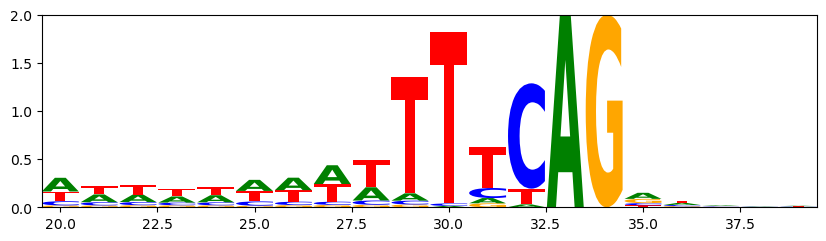

In [10]:
pwm20_acc_plt = logomaker.Logo(pwm20_acc, shade_below=.5, fade_below=.5)

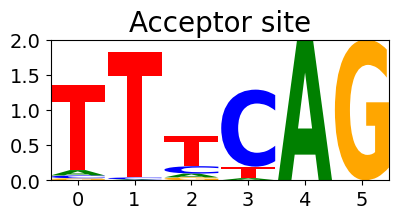

In [11]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

acc5_pwm = pwm20_acc[9:15].reset_index(drop=True)
acc5_logo = logomaker.Logo(acc5_pwm, ax=ax, shade_below=.5, fade_below=.5)

acc5_logo.fig.tight_layout()
plt.title('Acceptor site', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show
plt.savefig('acc6pwm.svg', format='svg')

This pwm suggests the acceptor site should be 8 base pairs long, with a top scoring motif being ATTTTCAG.

In [12]:
dists = pd.read_csv('apc_distances_original.csv')
# need to use .copy() to create new object, not a temporary object
# https://towardsdatascience.com/pandas-from-messy-to-beautiful-b03b0c32f767/
dists

,gene_id,apc_base,apc_nmd,apc_optiso,apc_optiso_nmd
0,1.710,9.972556e-01,0.997260,0.997482,0.997518
1,1.241,8.881784e-16,0.000000,0.877056,0.925497
2,1.378,3.334501e-03,0.003335,0.548824,0.866091
3,2.170,2.214024e-01,0.218025,0.381109,0.487243
4,1.294,5.544295e-04,0.004068,0.243709,0.349583
...,...,...,...,...,...
916,1.228,1.500516e-02,0.031095,0.287278,0.300773
917,1.980,3.970481e-01,0.498896,0.526387,0.745492
918,1.360,8.684934e-01,0.875991,0.970860,0.977658
919,1.165,9.751574e-03,0.432548,0.428739,0.457181


In [13]:
dists.loc[:, 'base_to_opt_nmd'] = dists['apc_optiso_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_nmd'] = dists['apc_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_opt'] = dists['apc_optiso'] - dists['apc_base']

In [14]:
dists.sort_values(by='apc_base', ascending=True)
pd.set_option('display.max_rows', 20)
#dists

In [15]:
dists.sort_values(by='base_to_opt_nmd', ascending=True)

,gene_id,apc_base,apc_nmd,apc_optiso,apc_optiso_nmd,base_to_opt_nmd,base_to_nmd,base_to_opt
446,1.147,0.951728,0.422737,0.963256,0.350203,-0.601526,-0.528991,0.011527
755,2.230,0.533133,0.650060,0.062836,0.062836,-0.470298,0.116926,-0.470298
404,1.200,0.496422,0.481618,0.924188,0.039409,-0.457012,-0.014804,0.427767
470,2.108,0.441418,0.498653,0.032608,0.008475,-0.432943,0.057235,-0.408811
253,3.680,0.490504,0.628152,0.063961,0.063961,-0.426543,0.137648,-0.426543
...,...,...,...,...,...,...,...,...
725,1.386,0.016312,0.019233,0.944550,0.962986,0.946674,0.002921,0.928238
698,1.402,0.004737,0.706976,0.938927,0.972535,0.967798,0.702239,0.934190
140,1.430,0.000258,0.021843,0.950056,0.973105,0.972846,0.021585,0.949798
148,1.415,0.010764,0.422572,0.920031,0.984551,0.973786,0.411807,0.909266


Some genes get worse the more optimizations you add. Let's look at gene 2.230.

In [16]:
# create a frequency polygon 
# 10 or 20 bins?
# second interval not included, example [0.0, 0.05), [0.05, 0.1)
#bins = [(round(x/20, 2), round(x/20 + 0.05, 2)) for x in range(0, 20, 1)]
bins = [[round(x/10, 2), round(x/10 + 0.1, 2)] for x in range(0, 10, 1)]
# get mid point
bins = [(x[0], x[1], round((x[0] + x[1])/2, 3)) for x in bins]
bins

[(0.0, 0.1, 0.05),
 (0.1, 0.2, 0.15),
 (0.2, 0.3, 0.25),
 (0.3, 0.4, 0.35),
 (0.4, 0.5, 0.45),
 (0.5, 0.6, 0.55),
 (0.6, 0.7, 0.65),
 (0.7, 0.8, 0.75),
 (0.8, 0.9, 0.85),
 (0.9, 1.0, 0.95)]

In [33]:
def get_dist_df(data, bins, col_name):
    
    bin_counts = {}
    for val in data:
        for bin in bins:
            if bin not in bin_counts:
                bin_counts[bin] = 0
            if val >= bin[0] and val < bin[1]:
                bin_counts[bin] += 1
            
    dfreq_data = {'mid': [], col_name: []}
    for item in bin_counts.items():
        dfreq_data['mid'].append(item[0][2])
        dfreq_data[col_name].append(item[1])

    dfreq_df = pd.DataFrame(dfreq_data)

    return dfreq_df

In [41]:
base_dfreq_df = get_dist_df(dists['apc_base'], bins, 'base_counts')
nmd_dfreq_df = get_dist_df(dists['apc_nmd'], bins, 'nmd_counts')
optiso_dfreq_df = get_dist_df(dists['apc_optiso'], bins, 'optiso_counts')
optiso_nmd_dfreq_df = get_dist_df(dists['apc_optiso_nmd'], bins, 'optiso_nmd_counts')

base_dfreq_df

,mid,base_counts
0,0.05,126
1,0.15,31
2,0.25,86
3,0.35,132
4,0.45,133
5,0.55,112
6,0.65,104
7,0.75,51
8,0.85,60
9,0.95,86


In [44]:
all_counts = pd.concat([
        base_dfreq_df, 
        nmd_dfreq_df['nmd_counts'], 
        optiso_dfreq_df['optiso_counts'],
        optiso_nmd_dfreq_df['optiso_nmd_counts']
    ], axis=1)
all_counts

,mid,base_counts,nmd_counts,optiso_counts,optiso_nmd_counts
0,0.05,126,101,72,50
1,0.15,31,16,19,13
2,0.25,86,57,37,20
3,0.35,132,117,34,36
4,0.45,133,141,58,74
5,0.55,112,109,61,48
6,0.65,104,109,100,71
7,0.75,51,73,104,66
8,0.85,60,62,160,169
9,0.95,86,136,276,374


In [52]:
# see what melt does
pd.melt(all_counts, ['mid'])

,mid,variable,value
0,0.05,base_counts,126
1,0.15,base_counts,31
2,0.25,base_counts,86
3,0.35,base_counts,132
4,0.45,base_counts,133
...,...,...,...
35,0.55,optiso_nmd_counts,48
36,0.65,optiso_nmd_counts,71
37,0.75,optiso_nmd_counts,66
38,0.85,optiso_nmd_counts,169


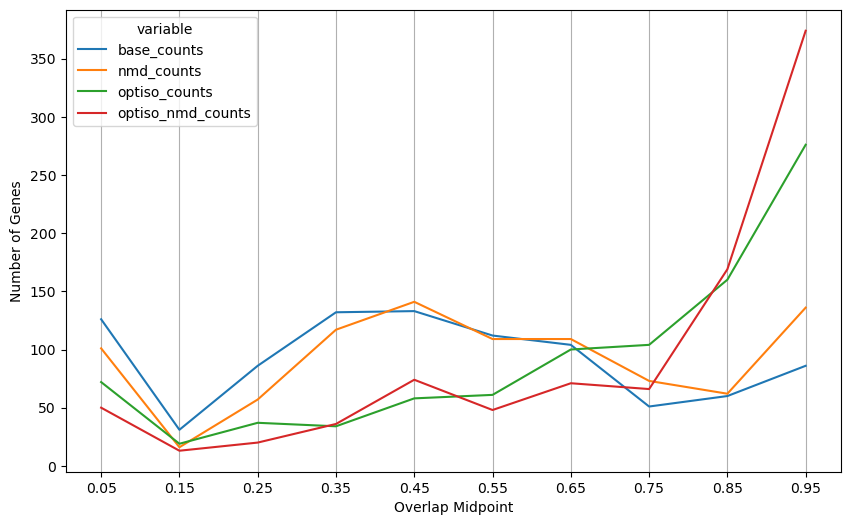

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='mid', y='value', hue='variable',
        data=pd.melt(all_counts, ['mid']))
ax.set_xticks(base_dfreq_df['mid'])
ax.xaxis.grid(True)
ax.set_xlabel('Overlap Midpoint')
ax.set_ylabel('Number of Genes')
plt.savefig('freq_poly', format='svg')

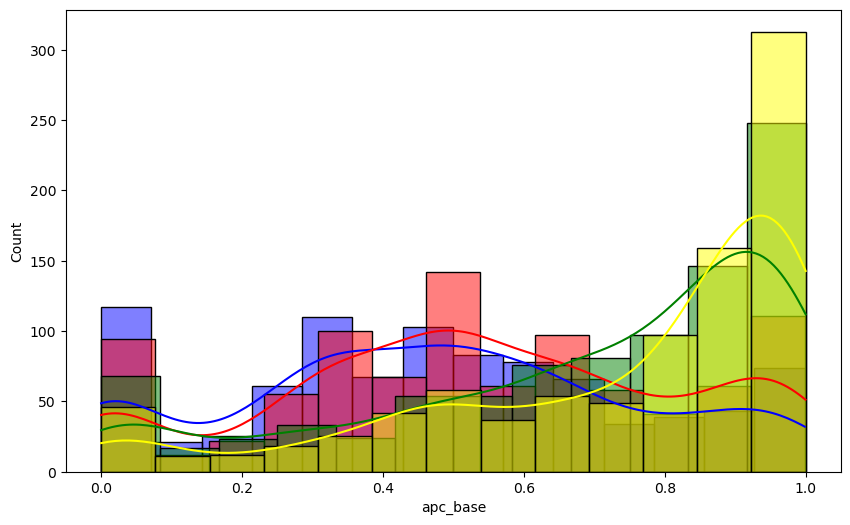

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dists, color='blue', x='apc_base', kde=True)
sns.histplot(data=dists, color='red', x='apc_nmd', kde=True)
sns.histplot(data=dists, color='green', x='apc_optiso', kde=True)
sns.histplot(data=dists, color='yellow', x='apc_optiso_nmd', kde=True)
plt.show()

In [16]:
base_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_base'])
nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_nmd'])
optiso_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso'])
optiso_nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso_nmd'])

In [17]:
vert_df = pd.concat([base_vals, nmd_vals, optiso_vals, optiso_nmd_vals], axis=0)
vert_df

,gene_id,variable,value
0,1.710,apc_base,9.972556e-01
1,1.241,apc_base,8.881784e-16
2,1.378,apc_base,3.334501e-03
3,2.170,apc_base,2.214024e-01
4,1.294,apc_base,5.544295e-04
...,...,...,...
916,1.228,apc_optiso_nmd,3.007733e-01
917,1.980,apc_optiso_nmd,7.454917e-01
918,1.360,apc_optiso_nmd,9.776584e-01
919,1.165,apc_optiso_nmd,4.571805e-01


<Axes: xlabel='value', ylabel='Count'>

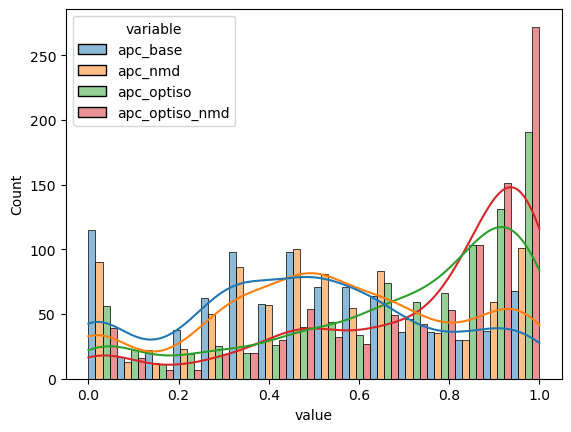

In [18]:
sns.histplot(data=vert_df, x='value', hue='variable', multiple='dodge', kde=True)

In [ ]:
# check trends for up2


In [ ]:
# ranks genes by biggest improvements to distance

In [5]:
# plot exon/intron length model for export into apc.svg
elen = pd.read_csv('../data/models/exon.len')
elen = elen.rename(columns={elen.columns[0]: 'Probability'})
elen.loc[:, 'Length'] = elen.index
elen

,Probability,Length
0,0.000000,0
1,0.000000,1
2,0.000000,2
3,0.000000,3
4,0.000000,4
...,...,...
995,0.000008,995
996,0.000008,996
997,0.000008,997
998,0.000008,998


In [6]:
ilen = pd.read_csv('../data/models/intron.len')
ilen = ilen.rename(columns={ilen.columns[0]: 'Probability'})
ilen.loc[:, 'Length'] = ilen.index
ilen

,Probability,Length
0,0.000000,0
1,0.000000,1
2,0.000000,2
3,0.000000,3
4,0.000000,4
...,...,...
995,0.000007,995
996,0.000006,996
997,0.000006,997
998,0.000006,998


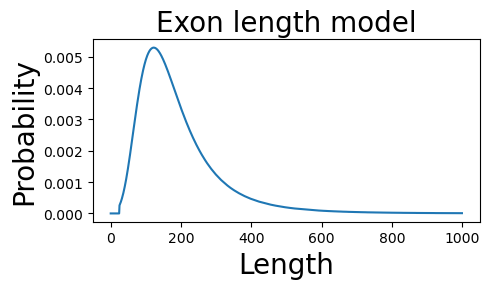

In [7]:
plt.figure(figsize=(5, 3))
ax = sns.lineplot(data=elen, x='Length', y='Probability')
ax.set_xlabel('Length', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
plt.title('Exon length model', fontsize=20)
plt.tight_layout()
plt.savefig('elen.svg', format='svg')

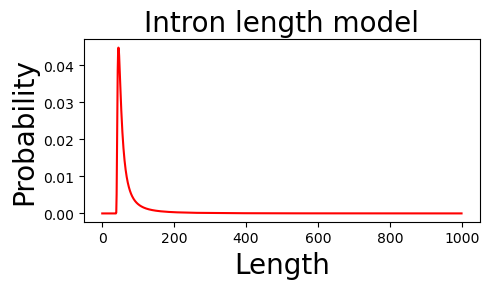

In [8]:
plt.figure(figsize=(5, 4))
ax = sns.lineplot(data=ilen, x='Length', y='Probability', color='red')
ax.set_xlabel('Length', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
plt.title('Intron length model', fontsize=20)
plt.tight_layout()
plt.savefig('ilen.svg', format='svg')

In [ ]:
plt.figure(figsize=(5, 4))
sns.lineplot(data=elen, x='Length', y='Probability')
sns.lineplot(data=ilen, x='Length', y='Probability', color='red')
plt.tight_layout()